TensorFlow (Low-level, from scratch) - 3-layer neural network.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [3]:
# Convert numpy arrays to TensorFlow tensors
X_train = tf.constant(X, dtype=tf.float32)
y_train = tf.constant(y, dtype=tf.float32)

In [4]:
# Define the model from scratch (low-level implementation)

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([1, 5]))
b1 = tf.Variable(tf.zeros([5]))
W2 = tf.Variable(tf.random.normal([5, 5]))
b2 = tf.Variable(tf.zeros([5]))
W3 = tf.Variable(tf.random.normal([5, 1]))
b3 = tf.Variable(tf.zeros([1]))

In [5]:
# Define the forward pass function
def forward(X):
    # Layer 1: Linear transformation + ReLU activation
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)  # ReLU activation

    # Layer 2: Linear transformation + ReLU activation
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.relu(Z2)  # ReLU activation

    # Layer 3: Output layer (no activation)
    Z3 = tf.matmul(A2, W3) + b3
    return Z3

In [6]:
# Define the loss function (Mean Squared Error)
def compute_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))  # MSE loss

In [7]:
# Define the backward pass (manual gradient computation)
def backward(X, y, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = forward(X)  # Ensure we compute forward pass inside the tape
        loss = compute_loss(y_pred, y)

    # Compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights and biases using gradient descent
    W1.assign_sub(learning_rate * gradients[0])  # Matches shape [1,5]
    b1.assign_sub(learning_rate * gradients[1])  # Matches shape [5]
    W2.assign_sub(learning_rate * gradients[2])  # Matches shape [5,5]
    b2.assign_sub(learning_rate * gradients[3])  # Matches shape [5]
    W3.assign_sub(learning_rate * gradients[4])  # Matches shape [5,1]
    b3.assign_sub(learning_rate * gradients[5])  # Matches shape [1]

    return loss

In [8]:
# Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    loss = backward(X_train, y_train)  # Backprop includes forward pass

    losses.append(loss.numpy())

    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.1521163135766983
Epoch 100, Loss: 0.014114261604845524
Epoch 200, Loss: 0.011585192754864693
Epoch 300, Loss: 0.010738987475633621
Epoch 400, Loss: 0.010399124585092068
Epoch 500, Loss: 0.010178064927458763
Epoch 600, Loss: 0.010014321655035019
Epoch 700, Loss: 0.009859920479357243
Epoch 800, Loss: 0.009713673032820225
Epoch 900, Loss: 0.009575050324201584


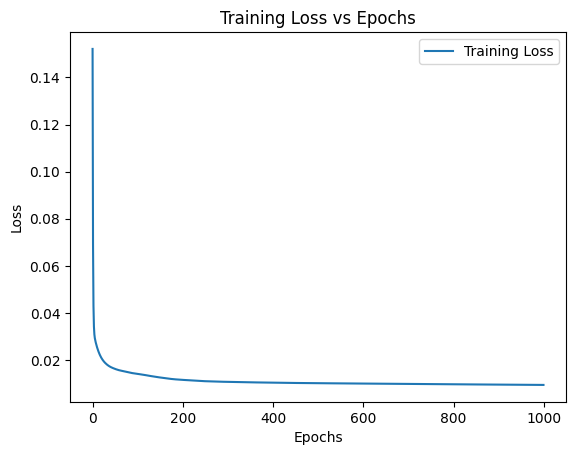

In [9]:
# Plotting the training loss curve
plt.plot(range(epochs), losses, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

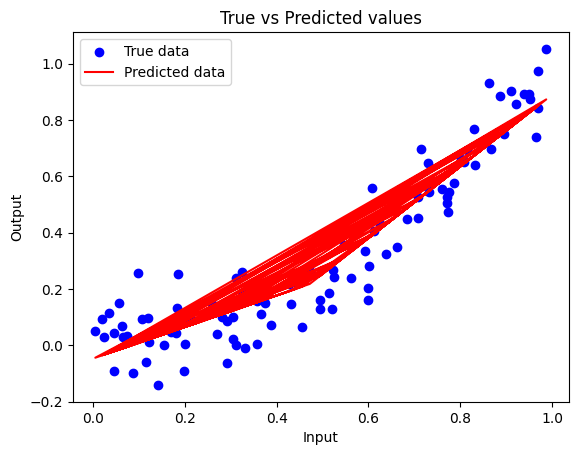

In [10]:
# Plotting the true vs predicted values
y_pred = forward(X_train).numpy()  # Get predictions from the trained model

plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='red', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()